## A collection of bode plot functions.

HTML output built with: jupyter nbconvert --to html svfbode.ipynb

https://cytomic.com/files/dsp/SvfLinearTrapOptimised2.pdf

In [594]:
from math import *
import cmath
import matplotlib.pyplot as plt

In [595]:
def db_from_lin(gain):
    return log(gain, 10.0) * 20.0


def lin_from_db(decibels):
    return pow(10.0, decibels * 0.05)

In [596]:
def svf_bode_digital(f_hz, coeffs, fs):
    a, g, k, a1, a2, a3, m0, m1, m2 = coeffs

    z = cmath.exp(-(pi * 2.0) * f_hz * 1.0j / fs)

    denominator = (g**2 + g*k + 1) + 2*(g**2 - 1)*z**-1 + (g**2 - g*k + 1)*z**-2

    y = m0 + (m1 * g * (1 - z**-2) + m2 * g**2 * (1 + 2*z**-1 + z**-2)) / denominator

    return abs(y)


In [597]:
def plot_svf(svf_coeffs):
    amplitude = []
    x = []
    for i in range(20, 20000, 10):
        n = svf_bode_digital(i, svf_coeffs, 96000)
        amplitude.append(db_from_lin(n.real))
        x.append(i)

    plt.xlim([20, 20000])
    plt.ylim([-36, 12])
    plt.semilogx(x, amplitude)

In [598]:
def lowpass(f0, q_value, fs):
    a = 1.0
    g = tan(pi * f0 / fs)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 0.0
    m1 = 0.0
    m2 = 1.0
    return a, g, k, a1, a2, a3, m0, m1, m2

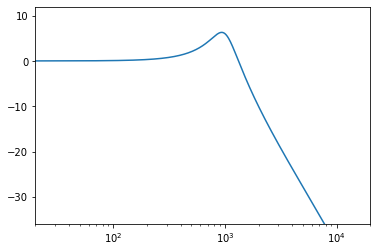

In [599]:
svf_coeffs = plot_svf(lowpass(1000, 2.0, 96000))

In [600]:
def highpass(f0, q_value, fs):
    a = 1.0
    g = tan(pi * f0 / fs)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 1.0
    m1 = -k
    m2 = -1.0
    return a, g, k, a1, a2, a3, m0, m1, m2

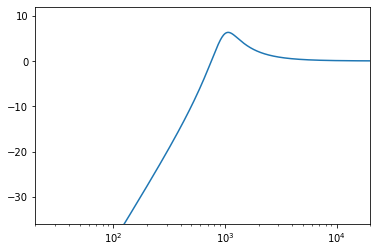

In [601]:
svf_coeffs = plot_svf(highpass(1000, 2.0, 96000))

In [603]:
def bandpass(f0, q_value, fs):
    a = 1.0
    g = tan(pi * f0 / fs)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 0.0
    m1 = 1.0
    m2 = 0.0
    return a, g, k, a1, a2, a3, m0, m1, m2

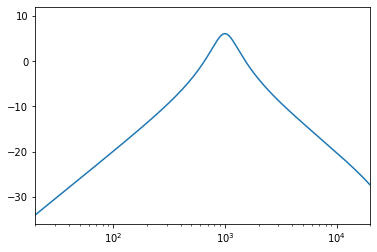

In [608]:
svf_coeffs = plot_svf(bandpass(1000, 2.0, 96000))

In [605]:
def bell(f0, q_value, db_gain, fs):
    a = pow(10, db_gain / 40.0)
    g = tan(pi * f0 / fs)
    k = 1.0 / (q_value * a)
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 1.0
    m1 = k * (a * a - 1.0)
    m2 = 0.0
    return a, g, k, a1, a2, a3, m0, m1, m2

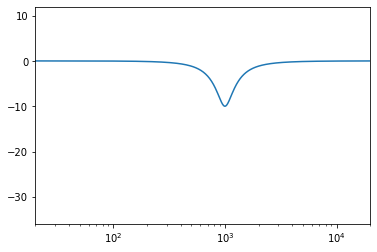

In [606]:
svf_coeffs = plot_svf(bell(1000, 2.0, -10, 96000))

In [613]:
def notch(f0, q_value, fs):
    a = 1
    g = tan(pi * f0 / fs)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 1.0
    m1 = -k
    m2 = 0.0
    return a, g, k, a1, a2, a3, m0, m1, m2

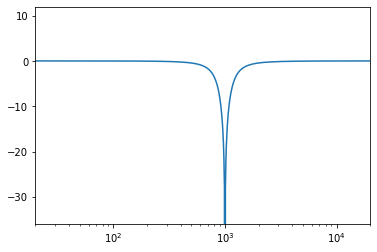

In [614]:
svf_coeffs = plot_svf(notch(1000, 2.0, 96000))

In [618]:
def allpass(f0, q_value, fs):
    a = 1
    g = tan(pi * f0 / fs)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 1.0
    m1 = -2.0 * k
    m2 = 0.0
    return a, g, k, a1, a2, a3, m0, m1, m2

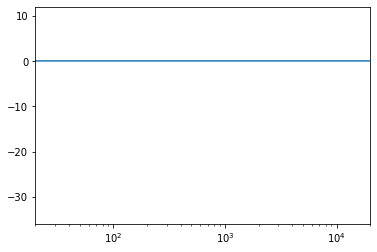

In [619]:
svf_coeffs = plot_svf(allpass(1000, 2.0, 96000))

In [620]:
def lowshelf(f0, q_value, db_gain, fs):
    a = pow(10, db_gain / 40.0)
    g = tan(pi * f0 / fs) / sqrt(a)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = 1.0
    m1 = k * (a - 1.0)
    m2 = a * a - 1.0
    return a, g, k, a1, a2, a3, m0, m1, m2

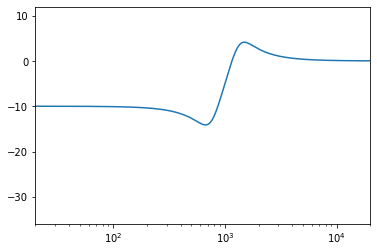

In [621]:
svf_coeffs = plot_svf(lowshelf(1000, 2.0, -10, 96000))

In [622]:
def highshelf(f0, q_value, db_gain, fs):
    a = pow(10, db_gain / 40.0)
    g = tan(pi * f0 / fs) * sqrt(a)
    k = 1.0 / q_value
    a1 = 1.0 / (1.0 + g * (g + k))
    a2 = g * a1
    a3 = g * a2
    m0 = a * a
    m1 = k * (1.0 - a) * a
    m2 = 1.0 - a * a
    return a, g, k, a1, a2, a3, m0, m1, m2

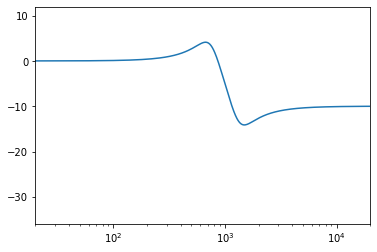

In [624]:
svf_coeffs = plot_svf(highshelf(1000, 2.0, -10, 96000))
